In [17]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML
from matplotlib import pyplot as plt

from hyperfit.linfit import LinFit

In [2]:
df_clean = pd.read_csv('clean_table_MBH_0303.csv')

In [3]:
nanpercent=0.16
cols_to_delete = df_clean.columns[df_clean.isnull().sum()/len(df_clean) > nanpercent]
df_lessnan=df_clean.drop(cols_to_delete, axis = 1)
df_purge=df_lessnan.dropna(axis='index',how='any')
print(df_purge.columns)
print(len(df_purge.columns))
#HTML(df_purge.to_html())

Index(['ETG', 'T-type', 'Bar', 'Disk', 'Ring', 'Core', 'Multiple',
       'Compactness', 'AGN', 'Pseudobulge', 'BCG', 'cD', 'M_BH', 'M_BH_std',
       'M*_sph', 'M*_gal', 'log_B/T', 'log_sigma0', 'log_R_e_sph_maj',
       'log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq',
       'log(I_e,sph,maj/M_Sun/pc^2)', 'log(I_e,sph,eq/M_Sun/pc^2)',
       'Concentration_Index', 'avg_Rho_1kpc_Exact_All', 'r1_density_approx',
       'log10(R10_kpc)', 'logRho_R10_approx', 'log_rho10_Exact',
       'log10(R90_kpc)', 'logRho_R90_approx', 'log_rho_90_Exact_all',
       'Rho_re_spatial', 'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new', 'log_Rho_soi_exact_new',
       'Avg_Rho_Re_Exact_all', 'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all',
       'Rho_re_Exact_all',

In [4]:
## useful functions
def x2name(feature_list,df_handson):
    for ind in feature_list:
        i=int(ind[1:])
        print('x',i,':',df_handson.columns[i])

def rmse(y,y_pred,w):
    return np.sqrt(np.average((y-y_pred)**2,weights=w))

def df2name(df):
    for i in range(len(df.columns)):
        print('x',i,':',df.columns[i])
        
def test_relation(df,operator='simp',ncyclesperiteration=550,niterations=40,denoise=False,adaptive_parsimony_scaling=20,verbosity=0,colname=False):
    y = df_purge['M_BH'].to_numpy()
    w = 1/df_purge['M_BH_std'].to_numpy()**2

    #df_handson = df
    if colname:
        X = df
    else:
        X = df.to_numpy()
        #X = df_handson

    if operator=='adv':
        model = PySRRegressor(
            binary_operators=["+", "-", "*", "/","pow"],
            unary_operators=["exp","log10"],
            warm_start=False,
            denoise=denoise,
            niterations=niterations,
            ncyclesperiteration=ncyclesperiteration,
            adaptive_parsimony_scaling=adaptive_parsimony_scaling,
            verbosity=verbosity,
            precision=64,
        )
    if operator=='simp':
        model = PySRRegressor(
            binary_operators=["+", "-", "*", "/", "pow"],
            warm_start=False,
            denoise=denoise,
            niterations=niterations,
            ncyclesperiteration=ncyclesperiteration,
            adaptive_parsimony_scaling=adaptive_parsimony_scaling,
            verbosity=verbosity,
            precision=64,
        )
        
    if operator=='basic':
        model = PySRRegressor(
            binary_operators=["+", "-", "*", "/"],
            warm_start=False,
            denoise=denoise,
            niterations=niterations,
            ncyclesperiteration=ncyclesperiteration,
            adaptive_parsimony_scaling=adaptive_parsimony_scaling,
            verbosity=verbosity,
            precision=64,
        )



    model.fit(X=X, y=y, weights=w)

    print('parameters:')
    df2name(df)
    
    print('Eq. selected rmse:',rmse(y,model.predict(X),w))
    display(model.sympy())
    
    for i in range(len(model.equations_)):
        print('Eq.',i,'rmse:',rmse(y,model.predict(X,index=i),w))
        display(model.sympy(index=i))

In [5]:
df_purge.columns

Index(['ETG', 'T-type', 'Bar', 'Disk', 'Ring', 'Core', 'Multiple',
       'Compactness', 'AGN', 'Pseudobulge', 'BCG', 'cD', 'M_BH', 'M_BH_std',
       'M*_sph', 'M*_gal', 'log_B/T', 'log_sigma0', 'log_R_e_sph_maj',
       'log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq',
       'log(I_e,sph,maj/M_Sun/pc^2)', 'log(I_e,sph,eq/M_Sun/pc^2)',
       'Concentration_Index', 'avg_Rho_1kpc_Exact_All', 'r1_density_approx',
       'log10(R10_kpc)', 'logRho_R10_approx', 'log_rho10_Exact',
       'log10(R90_kpc)', 'logRho_R90_approx', 'log_rho_90_Exact_all',
       'Rho_re_spatial', 'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new', 'log_Rho_soi_exact_new',
       'Avg_Rho_Re_Exact_all', 'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all',
       'Rho_re_Exact_all',

In [6]:
#test_relation(df_purge[['log_sigma0','log_B/T','logRho_soi_approx_new','Core', 'Pseudobulge']],
#             operator='basic',ncyclesperiteration=250,niterations=100,adaptive_parsimony_scaling=100)

In [7]:
test_relation(df_purge[['log_sigma0','log_B/T','logRho_R10_approx']],
             operator='basic',ncyclesperiteration=250,niterations=100,adaptive_parsimony_scaling=100)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : logRho_R10_approx
Eq. selected rmse: 0.35070722610782995


3.8254245537788885*x0 + x1

Eq. 0 rmse: 0.9082611474700465


8.233873226497941

Eq. 1 rmse: 0.4380087731031836


3.6607788794718945*x0

Eq. 2 rmse: 0.35070722610782995


3.8254245537788885*x0 + x1

Eq. 3 rmse: 0.3416990204291537


x0*(0.39608063589727677*x1 + 3.8015844064523336)

Eq. 4 rmse: 0.33237285446612436


x0**2 - 0.2627022381477806*x2 + 3.408678598111484

Eq. 5 rmse: 0.3167239866857892


x0**2 + 0.4050240413638662*x1*x2 + 3.331286861386634

Eq. 6 rmse: 0.3115228746417069


x0**2 + 0.20103801129761772*x0*x1*x2 + 3.345305794225909

Eq. 7 rmse: 0.30770007595483184


0.09704862516164223*x0**2*x1*x2 + x0**2 + 3.354609169058951

Eq. 8 rmse: 0.3007854408581123


x0**2 + 0.4366142690220971*x1*(x2*(x0 + x1) - 0.48697946313038387) + 3.3538028436777823

Eq. 9 rmse: 0.2992720326227293


x0**2 - 0.1992198038513852*x1 - 0.1992198038513852*x2*(-x1*(x0**2 + x1) + x1) + 3.352073143196107

In [8]:
test_relation(df_purge[['log_sigma0','log_B/T','logRho_e_approx_New']],
             operator='basic',ncyclesperiteration=250,niterations=100,adaptive_parsimony_scaling=100)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : logRho_e_approx_New
Eq. selected rmse: 0.35070722610783


3.8254245537809535*x0 + x1

Eq. 0 rmse: 0.9082611474700465


8.23387322649901

Eq. 1 rmse: 0.4380087731031836


3.660778879472187*x0

Eq. 2 rmse: 0.35070722610783


3.8254245537809535*x0 + x1

Eq. 3 rmse: 0.34726766321902397


3.8168752417349467*x0 + 0.90855513879276135*x1

Eq. 4 rmse: 0.3443560277615425


3.8168752417349467*x0 + x1 - 0.015476602400123395/x2

Eq. 5 rmse: 0.3329425991697394


3.8168752417349467*x0 + 0.26199441602535944*x1*x2 + x1

Eq. 6 rmse: 0.3246553089629556


3.792035225139493*x0 + x1*(0.2637106304736961*x1 + 0.2637106304736961*x2) + x1

Eq. 7 rmse: 0.30620942681992436


3.7959374588087806*x0 + x1 - 0.2754705277832468/(x2 - 0.21366373287517787 + 0.2754705277832468/x2)

Eq. 8 rmse: 0.3008545167216621


3.7959374588087806*x0 + x1 - 0.3433919945901635/(x2 - 0.801154464688349 + 0.7505467996914251/(x2*(x0 - x2)))

Eq. 9 rmse: 0.2997229828386291


3.7959374588087806*x0 + x1 + 0.2760969003407771/(x0 - x2 - 1.689344502378076 - 0.25862432864598372/x2)

In [9]:
test_relation(df_purge[['log_sigma0','log_B/T','logRho_R90_approx']],
             operator='basic',ncyclesperiteration=250,niterations=100,adaptive_parsimony_scaling=100)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : logRho_R90_approx
Eq. selected rmse: 0.3507072261078299


3.82542455377904*x0 + x1

Eq. 0 rmse: 0.9082611474700465


8.233873226493778

Eq. 1 rmse: 0.4380087731031836


3.6607788794719385*x0

Eq. 2 rmse: 0.3507072261078299


3.82542455377904*x0 + x1

Eq. 3 rmse: 0.34576646285603496


3.795937452943263*x0 + 0.8209057027196204*x1

Eq. 4 rmse: 0.3416990204291536


0.39608063601268284*x0*x1 + 3.801584406523288*x0

Eq. 5 rmse: 0.3391809603757669


3.676465213428106*x0 + 0.6165496469488396*x1 - 0.06109415561940943*x2

Eq. 6 rmse: 0.32427988836801924


3.764407645795063*x0 + 0.30576308751787473*x1*(x0**2 + x2)

Eq. 7 rmse: 0.3226683513614893


3.764407645795063*x0 - (x0**2 + x2)*(-0.30576308751787473*x1 - 0.04811808991039854)

Eq. 8 rmse: 0.3138613512541186


3.744096312313055*x0 - (x0**2 + x2)*(0.02852829797838149*x0*x2 + 0.23558130250200768)

Eq. 9 rmse: 0.30837275620144733


3.764407645795063*x0 - (-0.30576308751787473*x1 - 0.04811808991039854)*(x0*(x0 + x1) + x0 + x2)

Eq. 10 rmse: 0.29996063336321444


3.764407645795063*x0 - (-0.34106773687654357*x1 + 0.02505069364184338*x2)*(x0*(x0 + 0.25315689396871305) + x1 + x2)

In [10]:
test_relation(df_purge[['log_sigma0','log_B/T','Log_Avg_Rho_10kpc_approx']],
             operator='basic',ncyclesperiteration=250,niterations=100,adaptive_parsimony_scaling=100)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : Log_Avg_Rho_10kpc_approx
Eq. selected rmse: 0.34514031658545075


5.079838257582654 - 6.464573164924774/x2

Eq. 0 rmse: 0.9082611474700466


8.233873228709005

Eq. 1 rmse: 0.43800877310318387


3.6607788783963941*x0

Eq. 2 rmse: 0.34514031658545075


5.079838257582654 - 6.464573164924774/x2

Eq. 3 rmse: 0.31730172767524134


x0 + 3.3746303717144737 - 5.339978350440122/x2

Eq. 4 rmse: 0.3030849024471204


2*x0 + 1.6694224793813461 - 4.215383549190475/x2

Eq. 5 rmse: 0.2983256574375879


2*x0 + 2.162891378592292 - (x1 + 3.527928660725854)/x2

Eq. 6 rmse: 0.2983256574375877


2*x0 - x1/x2 + 2.1628913767051709 - 3.5279286646805854/x2

Eq. 7 rmse: 0.2981309873440246


2*x0 + 1.9464210121511618 - 1.8826353533008515/(x1 + x2) - 1.9686193720584264/x2

Eq. 8 rmse: 0.295726822608959


2*x0 - x0/x2 + 0.29946021888399244*x1 + 2.362458396500941 - 0.7416815254300734/x2

In [11]:
test_relation(df_purge[['log_sigma0','log_B/T','Log_Avg_Rho_100pc_approx']],
             operator='basic',ncyclesperiteration=250,niterations=100,adaptive_parsimony_scaling=100)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : Log_Avg_Rho_100pc_approx
Eq. selected rmse: 0.3668907146237445


5.135926771011769*x0 - 3.341953236476917

Eq. 0 rmse: 0.9082611474700465


8.233873226495987

Eq. 1 rmse: 0.43800877310318354


3.6607788794717253*x0

Eq. 2 rmse: 0.3668907146237445


5.135926771011769*x0 - 3.341953236476917

Eq. 3 rmse: 0.3528518748472889


3.8426146925742547*x0 + x1

Eq. 4 rmse: 0.3374559375501375


x0**2 + 0.4980118734167752*x1 + 3.3220633056482543

Eq. 5 rmse: 0.3294955977075606


x0**2 + 0.2953589771871615*x1*x2 + 3.346637102921641

Eq. 6 rmse: 0.3264470513780691


1.1493626264986403*x0**2 - x0 + 0.35811803284402915*x1*x2 + 4.8863753118491156

Eq. 7 rmse: 0.32497006887321306


1.162231653553481*x0**2 + 0.16366732140100776*x0*x1*x2 - x0 + 4.817538149647355

Eq. 8 rmse: 0.3217973507123879


1.1636568329834733*x0**2 - x0 + 0.2529083161981757*x1*x2*(x0 + x1) + 4.837680828939596

Eq. 9 rmse: 0.32153587220022245


1.1823409279267831*x0**2 + 0.11128730864765886*x0*x1*x2*(x0 + x1) - x0 + 4.729983076935866

In [12]:
test_relation(df_purge[['log_sigma0','log_B/T','Log_Avg_Rho_5kpc_approx']],
             operator='basic',ncyclesperiteration=250,niterations=100,adaptive_parsimony_scaling=100)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : Log_Avg_Rho_5kpc_approx
Eq. selected rmse: 0.3507072261078302


3.8254245537541585*x0 + x1

Eq. 0 rmse: 0.9082611474700465


8.23387322649901

Eq. 1 rmse: 0.4380087731031836


3.660778879471979*x0

Eq. 2 rmse: 0.3507072261078302


3.8254245537541585*x0 + x1

Eq. 3 rmse: 0.33268260578574566


x0 + 4.327050290630525 - 1.9440395505042276/x2

Eq. 4 rmse: 0.3117578448835969


3.2200904604218823*x0 - 1.1355659300075576/x2

Eq. 5 rmse: 0.31061907105817327


x0*(2.2200904604218823 + 0.03420668817180984/x0) + x0 - 1.1062768651890726/x2

Eq. 6 rmse: 0.308217205368215


2.311155875861804*x0 - 0.4873134525753283*x0/x2 + 2.073681474800917

Eq. 7 rmse: 0.29887962478349495


2*x0 + 0.46793342040875635*x1 + 2.870108165598078 - 1.2215521616581568/x2

Eq. 8 rmse: 0.29545366279027724


2*x0 + 0.427773838294253*x1 + 3.17046021345492 + (1.4638464532193984 - x0)/x2

In [13]:
def fit(paras,bounds,plot=True):
    paras.append('M_BH')
    stds=[]
    for para in paras:
        stds.append(para+'_std')
    
    df_=df[paras+stds].dropna(axis='index',how='any')
    xs=np.array(df_[paras]).transpose()
    errs=np.array(df_[stds]).transpose()
    cov=np.zeros((len(paras),len(paras),len(df_)))
    for i in range(len(paras)):
        cov[i,i,:]=errs[i]**2

    hf = LinFit(xs, cov)

    mcmc_samples, mcmc_lnlike = hf.emcee(bounds, verbose=False)
    print(np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1))
    
    
    if plot:
        c=np.mean(mcmc_samples, axis=1)
        y=xs[-1]
        y_pred=0
        for i in range(len(c)-2):
            y_pred+=c[i]*xs[i]
        y_pred+=c[-2]

    plt.figure(figsize=(8,6))
    plt.scatter(y,y_pred,label='predicted')
    plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),label='f(x)=x')
    plt.xlabel(r'True $\rm{log} M_{BH}$',fontsize=20)
    plt.ylabel(r'Predicted $\rm{log} M_{BH}$',fontsize=20)
    plt.legend()
    plt.show()
    
    w = 1/errs[-1]**2
    print('rmse:',np.sqrt(np.average((y-y_pred)**2,weights=w)))
    return np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1)

In [15]:
df = pd.read_csv('SMBH_Data_0303.csv',header=1)

[  8.22982802  -0.64402499   0.02471709 -10.72573902   0.7171132 ] [1.25607885 0.68228477 0.06958352 3.07810675 0.11991005]


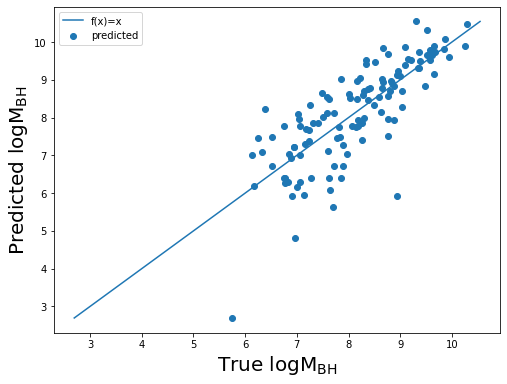

rmse: 0.6140251737653418


(array([  8.22982802,  -0.64402499,   0.02471709, -10.72573902,
          0.7171132 ]),
 array([1.25607885, 0.68228477, 0.06958352, 3.07810675, 0.11991005]))

In [18]:
fit(paras=['log_sigma0','log_B/T','logRho_R90_approx'],bounds = ((3.0, 4.0), (0.0, 1.0), (-1.0, 0.0), (-10.0, 10.0), (1.0e-5, 1.0)),plot=True)

[  8.33772024  -0.68781728   0.03978962 -11.03188932   0.73101483] [1.24112128 0.61916959 0.09209896 3.00917749 0.11665036]


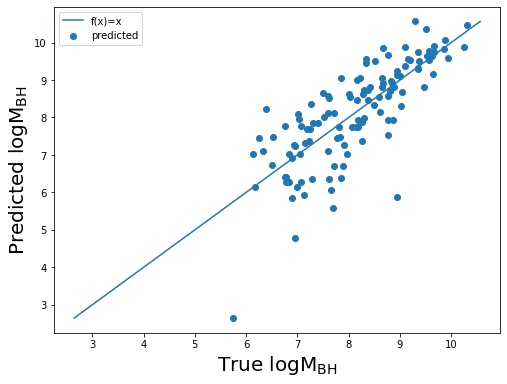

rmse: 0.624086270998197


(array([  8.33772024,  -0.68781728,   0.03978962, -11.03188932,
          0.73101483]),
 array([1.24112128, 0.61916959, 0.09209896, 3.00917749, 0.11665036]))

In [19]:
fit(paras=['log_sigma0','log_B/T','logRho_e_approx_New'],bounds = ((3.0, 4.0), (0.0, 1.0), (-1.0, 0.0), (-10.0, 10.0), (1.0e-5, 1.0)),plot=True)